## CCNSS 2018 Module 4: High dimensional representations and neural dynamics
# Tutorial 1: Introduction to PCA

[source](https://colab.research.google.com/drive/1a8zZUbLyTFHq6mV568uV5JVk1ItPhjs_)

*Please execute the cell bellow in order to initialize the notebook environment*

In [1]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import math                        # import basic math functions
import random                      # import basic random number generator functions

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

# Objectives

In this notebook we will examine the mathematical and computational aspects of  Principal Component Analysis (PCA). Following up on the mathematical tutorial (chalk talk), we will implement the PCA algorithm via the (data) covariance matrix. We will introduce the relationship between the eigenvalues of the covariance matrix and the variance of the data and how we can use this to approximate the dimension of the subspace where the data resides.  

## Background

PCA as used in data analysis is a method to qualitatively understand the structure of data. This data could come from neural recordings, e.g., spike count data for a set of $M$ neurons. It might be possible to represent the data more compactly via $k<M$ so-called latent variables. 

In this first tutorial, we will try to develop an intuitive understanding of the topics developed during the mathematical tutorial and the lecture on dimensionality reduction. 


We will carry out several steps to examine PCA in mock data:

* Construct the covariance matrix from a two-dimensional mock data set
* Calculate eigenvalues and eigenvectors (principal components of the covariance matrix)
* Visualize the data in two dimensions and its reduction to  one dimension 


**EXERCISE 1**

 Given 8 data points x_n, where n = 2 is the dimension of the data set, we construct a the data matrix X of size 8x2 

• Plot each data point x_n as a black dot in a two-dimensional space.

• Plot the mean of the data µ as a green point.



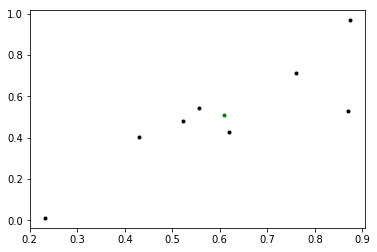

In [25]:
np.random.seed(8)
X = np.random.random((8,2))
#Insert your code here
plt.plot(X[:,0], X[:,1], 'k.')
plt.plot(np.mean(X[:,0]), np.mean(X[:,1]), 'g.')

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/1_pca/figures/Mod4T1E1.png)

**EXERCISE 2**

Given the data matrix X, construct the covariance matrix Y by
- removing the mean from each column of the matrix thus forming a matrix $X^*$ with zero mean
- constructing the covariance matrix $Y~=X^{*T}X^*$, where T is the transpose of a matrix. 

Make a function that calculates the covariance matrix given the data matrix and print the output. 


In [26]:
# insert your code here
#x_centered = X - np.dot(np.ones((X.shape[0], 1), np.mean(X, 0, keepdims=True)))

print(np.ones((X.shape[0], 1)))
print(np.mean(X, 0, keepdims=True))
print(np.dot(np.ones((X.shape[0], 1)), np.mean(X, 0, keepdims=True)))

x_centered = X - np.dot(np.ones((X.shape[0], 1)), np.mean(X, 0, keepdims=True))
print(np.mean(x_centered, 0))
C = np.dot(np.transpose(x_centered), x_centered)/X.shape[0]
print(C)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.60805374 0.50917383]]
[[0.60805374 0.50917383]
 [0.60805374 0.50917383]
 [0.60805374 0.50917383]
 [0.60805374 0.50917383]
 [0.60805374 0.50917383]
 [0.60805374 0.50917383]
 [0.60805374 0.50917383]
 [0.60805374 0.50917383]]
[6.93889390e-17 1.38777878e-17]
[[0.04307335 0.04553515]
 [0.04553515 0.06512377]]


**EXPECTED OUTPUT**
```

Y (cov matrix) = [[0.04307335 0.04553515]
 [0.04553515 0.06512377]]
 ```


**EXERCISE 3**

Recall that an eigenvalue of a matrix $A$ is a number $\alpha$ such that,  the following relationship holds: $$ Ay = \alpha y,$$ where $y$ is the eigenvector of the matrix $A$.

In this exercise we will calculate the eigenvalues and eigenvectors of the covariance matrix $Y$ using the function np.linalg.eig, which gives you the eigenvalues and eigenvectors as:
(eigVal, eigVect) = np.linalg.eig(Y), where eigVal are the eigenvalues, eigVect are the eigenvectors, and $Y$ is the covariance matrix.   Print the output eigenvalues and eigenvectors. Check that the trace of your covariance matrix is equal to the sum of the eigenvalues. 



In [35]:
# insert your code here
eigVal, eigVec = np.linalg.eig(C)
print(eigVal)
print(eigVec)

print(np.dot(eigVal[0], eigVec[:,0]))
print(np.dot(C, eigVec[:,0]))

[0.00724768 0.10094944]
[[-0.78591528 -0.6183342 ]
 [ 0.6183342  -0.78591528]]
[-0.00569606  0.00448149]
[-0.00569606  0.00448149]


**EXPECTED OUTPUT**
```

eigenval =  [0.00724768 0.10094944]
eigenvec =  [[-0.78591528 -0.6183342 ]
 [ 0.6183342  -0.78591528]]
 
 ```


**EXERCISE 4**

Print the first PC and plot the PC space spanned by the first principal component (a line), on top of the data points plot. **Hint:**  The principal component, i.e., the first eigenvector gives you the direction, but you must provide the offset: the line must pass through the green point

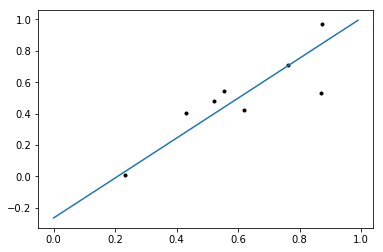

In [36]:
# insert your code here
plt.plot(X[:,0], X[:,1], 'k.')
x = np.arange(0, 1, 0.01)
offset = np.mean(X[:,1]) - np.mean(X[:,0]) /eigVec[0,1]*eigVec[1,1]
y = x/eigVec[0,1]*eigVec[1,1] + offset
plt.plot(x, y)

**EXPECTED OUTPUT**


```
PC_1 = [-0.6183342  -0.78591528]

```
![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/1_pca/figures/Mod4T1E4.png)


- Plot the other (second) eigenvector. In what direction do you anticipate the other eigenvector to be?


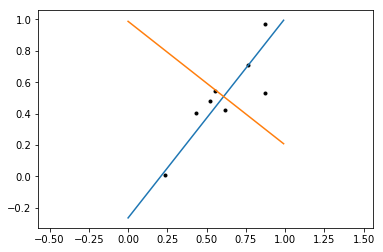

In [70]:
# insert your code here
plt.plot(X[:,0], X[:,1], 'k.')
x = np.arange(0, 1, 0.01)
offset = np.mean(X[:,1]) - np.mean(X[:,0]) /eigVec[0,1]*eigVec[1,1]
y = x/eigVec[0,1]*eigVec[1,1] + offset
plt.plot(x, y)

offset2 = np.mean(X[:,1]) - np.mean(X[:,0]) /eigVec[0,0]*eigVec[1,0]
y2 = x/eigVec[0,0]*eigVec[1,0] + offset2
plt.axis('equal')
plt.plot(x, y2)


**EXPECTED OUTPUT**


![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/1_pca/figures/Mod4T1E4c.png)




**EXERCISE 5**

- Project each data point onto the first PC, and plot each projected data point
as a red dot. (Hint: The projected points should lie on the principal component line.)


1.0
[-1.30126217 -0.95466031 -0.15286238 -0.58238767 -0.69916304 -0.77045127
 -1.03035381 -0.71804266]
xx
[0.6183342  0.78591528]
1.4042494727139991
-0.8682954691775685


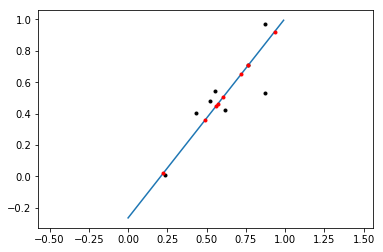

In [55]:
# insert your code here
plt.plot(X[:,0], X[:,1], 'k.')
x = np.arange(0, 1, 0.01)
offset = np.mean(X[:,1]) - np.mean(X[:,0]) /eigVec[0,1]*eigVec[1,1]
y = x/eigVec[0,1]*eigVec[1,1] + offset
plt.plot(x, y)

print(eigVec[0,1]**2 + eigVec[1,1]**2)
print(np.dot(X, eigVec[:,1]))
print('xx')
print(-eigVec[:,1])
print(np.dot(np.array([1,1]), -eigVec[:,1]))
print(np.dot(np.array([1,1]), -eigVec[:,1])* eigVec[0,1])

x_proj = np.dot(x_centered, eigVec[:,1])*eigVec[0,1] + np.mean(X[:,0])
y_proj = np.dot(x_centered, eigVec[:,1])*eigVec[1,1] + np.mean(X[:,1])

plt.axis('equal')
plt.plot(x_proj, y_proj, 'r.')



**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/1_pca/figures/Mod4T1E5.png)



- Plot line segments between the datapoints and their projections. Check that such segments are orthogonal to the PC space spanned by the principal components. 

1.0
[-1.30126217 -0.95466031 -0.15286238 -0.58238767 -0.69916304 -0.77045127
 -1.03035381 -0.71804266]
xx
[0.6183342  0.78591528]
1.4042494727139991
-0.8682954691775685


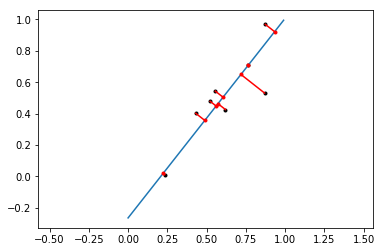

In [63]:
# insert your code here
plt.plot(X[:,0], X[:,1], 'k.')
x = np.arange(0, 1, 0.01)
offset = np.mean(X[:,1]) - np.mean(X[:,0]) /eigVec[0,1]*eigVec[1,1]
y = x/eigVec[0,1]*eigVec[1,1] + offset
plt.plot(x, y)

print(eigVec[0,1]**2 + eigVec[1,1]**2)
print(np.dot(X, eigVec[:,1]))
print('xx')
print(-eigVec[:,1])
print(np.dot(np.array([1,1]), -eigVec[:,1]))
print(np.dot(np.array([1,1]), -eigVec[:,1])* eigVec[0,1])

x_proj = np.dot(x_centered, eigVec[:,1])*eigVec[0,1] + np.mean(X[:,0])
y_proj = np.dot(x_centered, eigVec[:,1])*eigVec[1,1] + np.mean(X[:,1])

plt.axis('equal')
plt.plot(x_proj, y_proj, 'r.')

for i in range(X.shape[0]):
    plt.plot(np.array([X[i,0],x_proj[i]]), np.array([X[i,1], y_proj[i]]), 'r')

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/1_pca/figures/Mod4T1E5b.png)


 - Calculate the variance of the projections of the data matrix along the principal component. What is the relationship between this number and the eigenvalues previously calculated? 

1.0
[-1.30126217 -0.95466031 -0.15286238 -0.58238767 -0.69916304 -0.77045127
 -1.03035381 -0.71804266]
xx
[0.6183342  0.78591528]
1.4042494727139991
-0.8682954691775685
[-0.52511426 -0.17851239  0.62328554  0.19376024  0.07698487  0.00569664
 -0.2542059   0.05810525]
0.10094944117143889


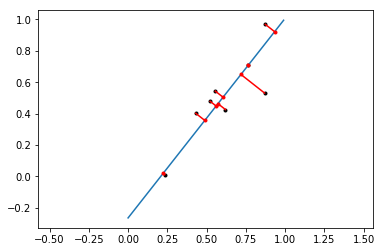

In [69]:
# insert your code here
plt.plot(X[:,0], X[:,1], 'k.')
x = np.arange(0, 1, 0.01)
offset = np.mean(X[:,1]) - np.mean(X[:,0]) /eigVec[0,1]*eigVec[1,1]
y = x/eigVec[0,1]*eigVec[1,1] + offset
plt.plot(x, y)

print(eigVec[0,1]**2 + eigVec[1,1]**2)
print(np.dot(X, eigVec[:,1]))
print('xx')
print(-eigVec[:,1])
print(np.dot(np.array([1,1]), -eigVec[:,1]))
print(np.dot(np.array([1,1]), -eigVec[:,1])* eigVec[0,1])

x_proj = np.dot(x_centered, eigVec[:,1])*eigVec[0,1] + np.mean(X[:,0])
y_proj = np.dot(x_centered, eigVec[:,1])*eigVec[1,1] + np.mean(X[:,1])

plt.axis('equal')
plt.plot(x_proj, y_proj, 'r.')

for i in range(X.shape[0]):
    plt.plot(np.array([X[i,0],x_proj[i]]), np.array([X[i,1], y_proj[i]]), 'r')
    
    
print(np.dot(x_centered, eigVec[:,1]))
print(np.var(np.dot(x_centered, eigVec[:,1])))

**EXPECTED OUTPUT**
```
var =  0.10094944117143889
```

BONUS: In exercise 4 you plotted the two eigenvectors/lines. How would you scale the length of these eigenvectors so that they are more informative with respect to the variance they capture?